In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb

#from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [11]:
df=pd.read_csv(r"E:\data course\6-Python\Week04\DT - RF - XGBoost\co2.csv")
df

,YYYYMM,Value
0,197301,72.076
1,197302,64.442
2,197303,64.084
3,197304,60.842
4,197305,61.798
...,...,...
518,201603,72.840
519,201604,71.410
520,201605,82.510
521,201606,115.772


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YYYYMM  523 non-null    int64  
 1   Value   523 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.3 KB


In [18]:
df.nunique()

YYYYMM    523
Value     523
Month      12
Year       44
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YYYYMM,523.0,199435.912046,1259.444618,197301.000,198311.500,199410.000,200508.5000,201607.000
Value,523.0,125.778954,31.903910,60.544,102.015,129.054,151.5025,188.407


<Axes: xlabel='Value'>

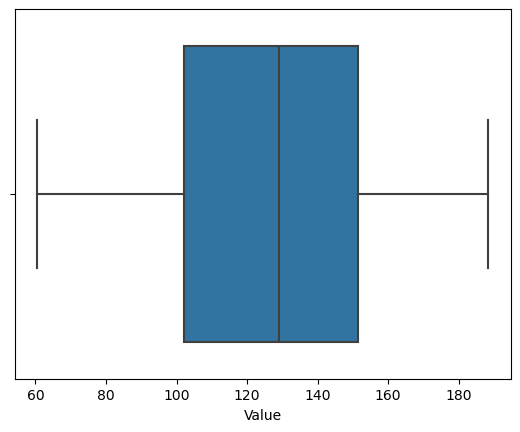

In [14]:
# outliers
sns.boxplot(data=df,x='Value')

In [16]:
df['Month'] = df.YYYYMM.astype(str).str[4:6].astype(float)
df['Year'] = df.YYYYMM.astype(str).str[0:4].astype(float)

In [17]:
df.head()

,YYYYMM,Value,Month,Year
0,197301,72.076,1.0,1973.0
1,197302,64.442,2.0,1973.0
2,197303,64.084,3.0,1973.0
3,197304,60.842,4.0,1973.0
4,197305,61.798,5.0,1973.0


In [19]:
df.drop(['YYYYMM'], axis=1, inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)      # ????
df.tail(5)

,Value,Month,Year
518,72.840,3.0,2016.0
519,71.410,4.0,2016.0
520,82.510,5.0,2016.0
521,115.772,6.0,2016.0
522,135.958,7.0,2016.0


In [21]:
df.isnull().sum()

Value    0
Month    0
Year     0
dtype: int64

In [22]:
X=df[['Month','Year']].values
y=df['Value'].values

In [23]:
y

array([ 72.076,  64.442,  64.084,  60.842,  61.798,  66.538,  72.626,
        75.181,  68.397,  67.668,  67.021,  71.118,  70.55 ,  62.929,
        64.519,  60.544,  64.687,  64.736,  73.698,  72.559,  63.221,
        65.418,  65.593,  71.677,  72.708,  65.117,  66.532,  61.975,
        62.031,  67.875,  74.184,  77.029,  66.156,  66.651,  67.625,
        75.857,  81.264,  71.058,  73.361,  68.703,  68.985,  73.936,
        80.968,  81.962,  72.95 ,  74.746,  78.924,  84.49 ,  87.215,
        75.943,  75.092,  68.641,  74.916,  80.942,  90.667,  89.046,
        80.975,  77.369,  78.058,  83.279,  85.191,  71.476,  67.829,
        69.051,  74.201,  81.372,  88.003,  91.836,  85.066,  79.494,
        79.291,  87.107,  93.946,  83.91 ,  83.689,  78.077,  83.19 ,
        88.15 ,  96.579,  97.246,  84.463,  86.071,  86.09 ,  94.293,
       100.568,  94.862,  93.21 ,  81.245,  82.785,  91.484, 107.126,
       106.245,  95.662,  90.03 ,  91.239, 102.138, 108.164,  94.766,
        95.724,  86.

In [25]:
data_dmatrix = xgb.DMatrix(X,label=y)
data_dmatrix

In [27]:
# test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Model
reg_mod = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.08,
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=7,
    gamma=0,
)
reg_mod.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [31]:
#After training the model, we'll check the model training score
scores = cross_val_score(reg_mod, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.97


In [32]:
reg_mod.fit(X_train,y_train)

predictions = reg_mod.predict(X_test)

In [33]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 7.369991


In [34]:
from sklearn.metrics import r2_score
r2 = np.sqrt(r2_score(y_test, predictions))
print("R_Squared Score : %f" % (r2))

R_Squared Score : 0.974818


<Axes: xlabel='Year', ylabel='Value'>

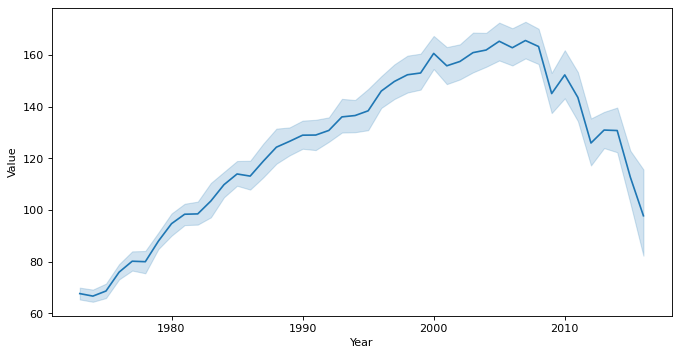

In [35]:
plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='Year', y='Value', data=df)

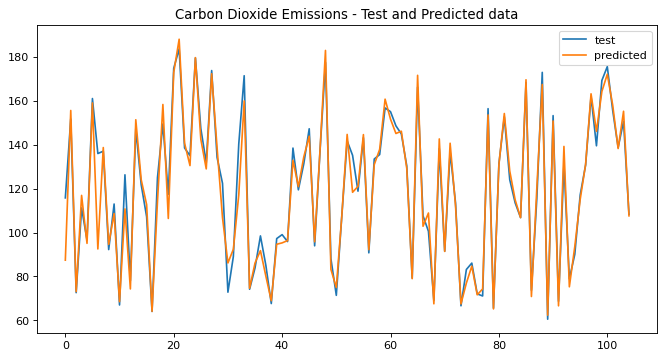

In [36]:
plt.figure(figsize=(10, 5), dpi=80)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="test")
plt.plot(x_ax, predictions, label="predicted")
plt.title("Carbon Dioxide Emissions - Test and Predicted data")
plt.legend()
plt.show()

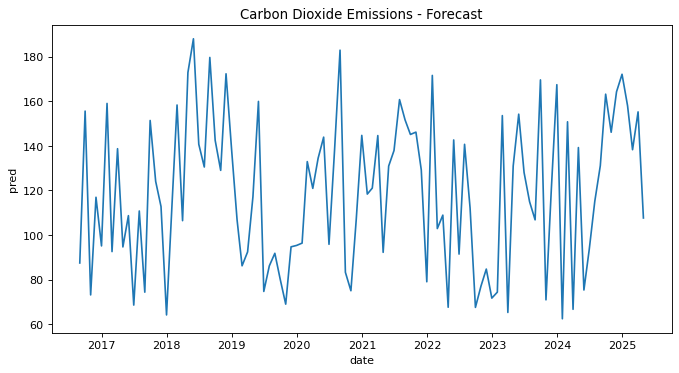

In [37]:
plt.figure(figsize=(10, 5), dpi=80)
df1=pd.DataFrame(predictions, columns=['pred']) 
df1['date'] = pd.date_range(start='8/1/2016', periods=len(df1), freq='M')
sns.lineplot(x='date', y='pred', data=df1)
plt.title("Carbon Dioxide Emissions - Forecast")
plt.show()